# Notes on Princeton Clusters
    Authors: Gregory R. Macchio
    Last Edited: 02/18/2023

## 1. References

1. Guide to , Princeton's Research Computing Clusters, https://researchcomputing.princeton.edu/get-started/guide-princeton-clusters
2. Adroit Computing Cluster, https://researchcomputing.princeton.edu/systems/adroit
3. PyTorch on the HPC Clusters, https://researchcomputing.princeton.edu/support/knowledge-base/pytorch
4. Python on the HPC Clusters, https://researchcomputing.princeton.edu/support/knowledge-base/python

## 2. Background

### 2.a. Terminology

- $\textit{Supercomputer:}$ specialized computer for a particular task.
- $\textit{Computer Cluster:}$ collection of low-cost computers with software that makes them communicate effectively.
- $\textit{Node:}$ computer in cluster.
- $\textit{Head Node:}$ computer which we log into, submit jobs, and edit scripts.
- $\textit{Compute Node:}$ computer which is dedicated to computation.
- $\textit{Job Scheduler:}$ software located on the head node that allows us to submit computational jobs to the compute nodes.
- $\textit{Central Processing Unit (CPU):}$ hardware that gathers data from RAM, sets data from RAM, outputs to devices, takes input from devices, adds numbers, and compares numbers all in binary.
- $\textit{Parallel Operations:}$ operations that are taking place at the same time.
- $\textit{Concurrent Operations:}$ operations that are taking place one after the other.
- $\textit{CPU Cores:}$ specialized hardware inside CPU that actually does all the actions of a CPU. There can be multiple cores. All cores work in parallel.
- $\textit{Core Hyper-Thread:}$ instead of waiting for the retrival of information from RAM, the core switchs to another thread (RAM gathering/setting information highway) and works on that job. Threads operate concurrently.
- $\textit{Graphics Processing Unit (GPU):}$ originally intended to generate graphics, this piece of hardware can conduct large matrix algebra calculations.
- $\textit{Video Random Access Memory. (GPU):}$ RAM-type hardware dedicated to the GPU.
- $\textit{Process or Task:}$ the compiled program on RAM.
- $\textit{Parallelized Code:}$ code the programmer breaks up into independent pieces where each piece runs on its own set of CPU cores. Note, the programmer parallelizes the code, not the OS, and each piece of code runs in parallel.
- $\textit{Thread:}$ a piece of parallized code (see previous definition). This should not be confused with "thread" in hyper-threading. "Threads" in hyper-threading run concurrently, while "threads" in parallelized code run in parallel.
- $\textit{Field-Programmanble Gate Array (FPGA):}$ an integrated circuit designed to be configured after manufacturing – hence the term field-programmable.
- $\textit{Serial Programming:}$ only one instruction is processed at a time.
- $\textit{Parallel Programming:}$ code is broken into small pieces and run in parallel or concurrently.
- $\textit{Embarassingly Parallel:}$ running the same program with different parameters as multiple processes.
- $\textit{Shared Memory Parallelism (Multithreading):}$ processes have sub-processes known as threads on seperate cores. Threads share memory.
- $\textit{Distributed-Memory Parallelism (Multiprocessing):}$ running multiple processess that do not share the same space in memory. They communicate at the end of computation tasks.
- $\textit{Accelerator Parallelism:}$ using different types of computer hardware such as GPUs or of FPGAs
- $\textit{Shell:}$ program that takes commands from the keyboard and gives them to the OS to perform. For example, the "\bin\bash" shell.
- $\textit{Login Shell:}$ the shell given to the head node upon login.
- $\textit{Secure Shell Client (SSH):}$ software that establishes a secure connection to machines.

### 2.b. Notes

- Processes on the CPU have a dedicated location in RAM, and CPU-core number and location is dictated by the OS which may change during run time.
- In clustering, however, we choose the number of cores per process in which the OS controls. If the code is edited in a parallel manner, then we deliberately tell the process to use all cores in parallel. Although the OS does run some things in parallel itself, when its obvious for it, the OS is oblivious to your code's construction and you must tell it to run in a  parallel manner when you know it will be faster.
- Code needs to be editted to run parallel operations. $\textit{OpenML}$ is a library that aids in multithreading.
- While a CPU has ones or tens of processing cores, a GPU has thousands.
- Algorithms that require lots of logic such as "if" statements tend to perform better on the CPU.
- To use the GPU, the data is first copied from the RAM (CPU memory) to VRAM (GPU memory). Once the GPU's operations are complete the output data is copied from VRAM to RAM. Data transfers between RAM and VRAM take time which can decrease performance.
- Overloading the GPU is when the order of magnitude of the number of operations is one larger than the number of GPU cores.

## 3. Notes On The Princeton Computer Clusters

### 2.a. Rules to Follow On The Princeton Computer Clusters

- $\textit{10-10 Rule:}$ only use head node to conduct computations if it is for 10 minutes at 10% cores.
- Only after a job has completed should the job output files be transferred from "/scratch/network" to your device or other cluster long-term storage.
- Do not load modules in your shell's startup script (\bin\bash). Instead load modules in SLURM script.
- Do not go over storage quota (RAM-per-CPU-core).
- Do not ask for more cores then required. Serial codes cannot run in parallel so using more than one CPU-core will not cause the job to run faster. Instead, doing so will waste resources and cause your next job to have a lower priority. (Note, this is not entirely true. By testing a single job, varying core number, one can show there is a speed up increasing core number. This means there is hyperthreading accross cores.)
- You must conduct scaling analysis for parallel codes.
- You must make every effort to use all of the CPU-cores on a node before requesting an additional node.

### 2.b. Facts About The Princeton Computer Clusters

- When accessing your scratch folder on adroit use "/scratch/network/gm0796".
- When accessing your scratch folder other clusters use "/scratch/".
- On Adroit, there is a maximum of 8 SLURM jobs per person.
- No internet access on compute nodes. All files must be submitted beforehand.
- All clusters, not including Nobel, have GPUs.
- Princeton clusters use the SLURM Job Scheduler
- Every SLURM Job consists of
    - my code and 
    - SLURM script.
- SLURM scripts are for
    - prescribing the resource requirements for the job,
    - setting the environment, and
    - specifying the work to be carried out in the form of shell commands.
- If the SLURM script is located in "directory A", then any files downloaded from the running program are stored in "directory A".
- Adriot Computing Cluster Statistics:
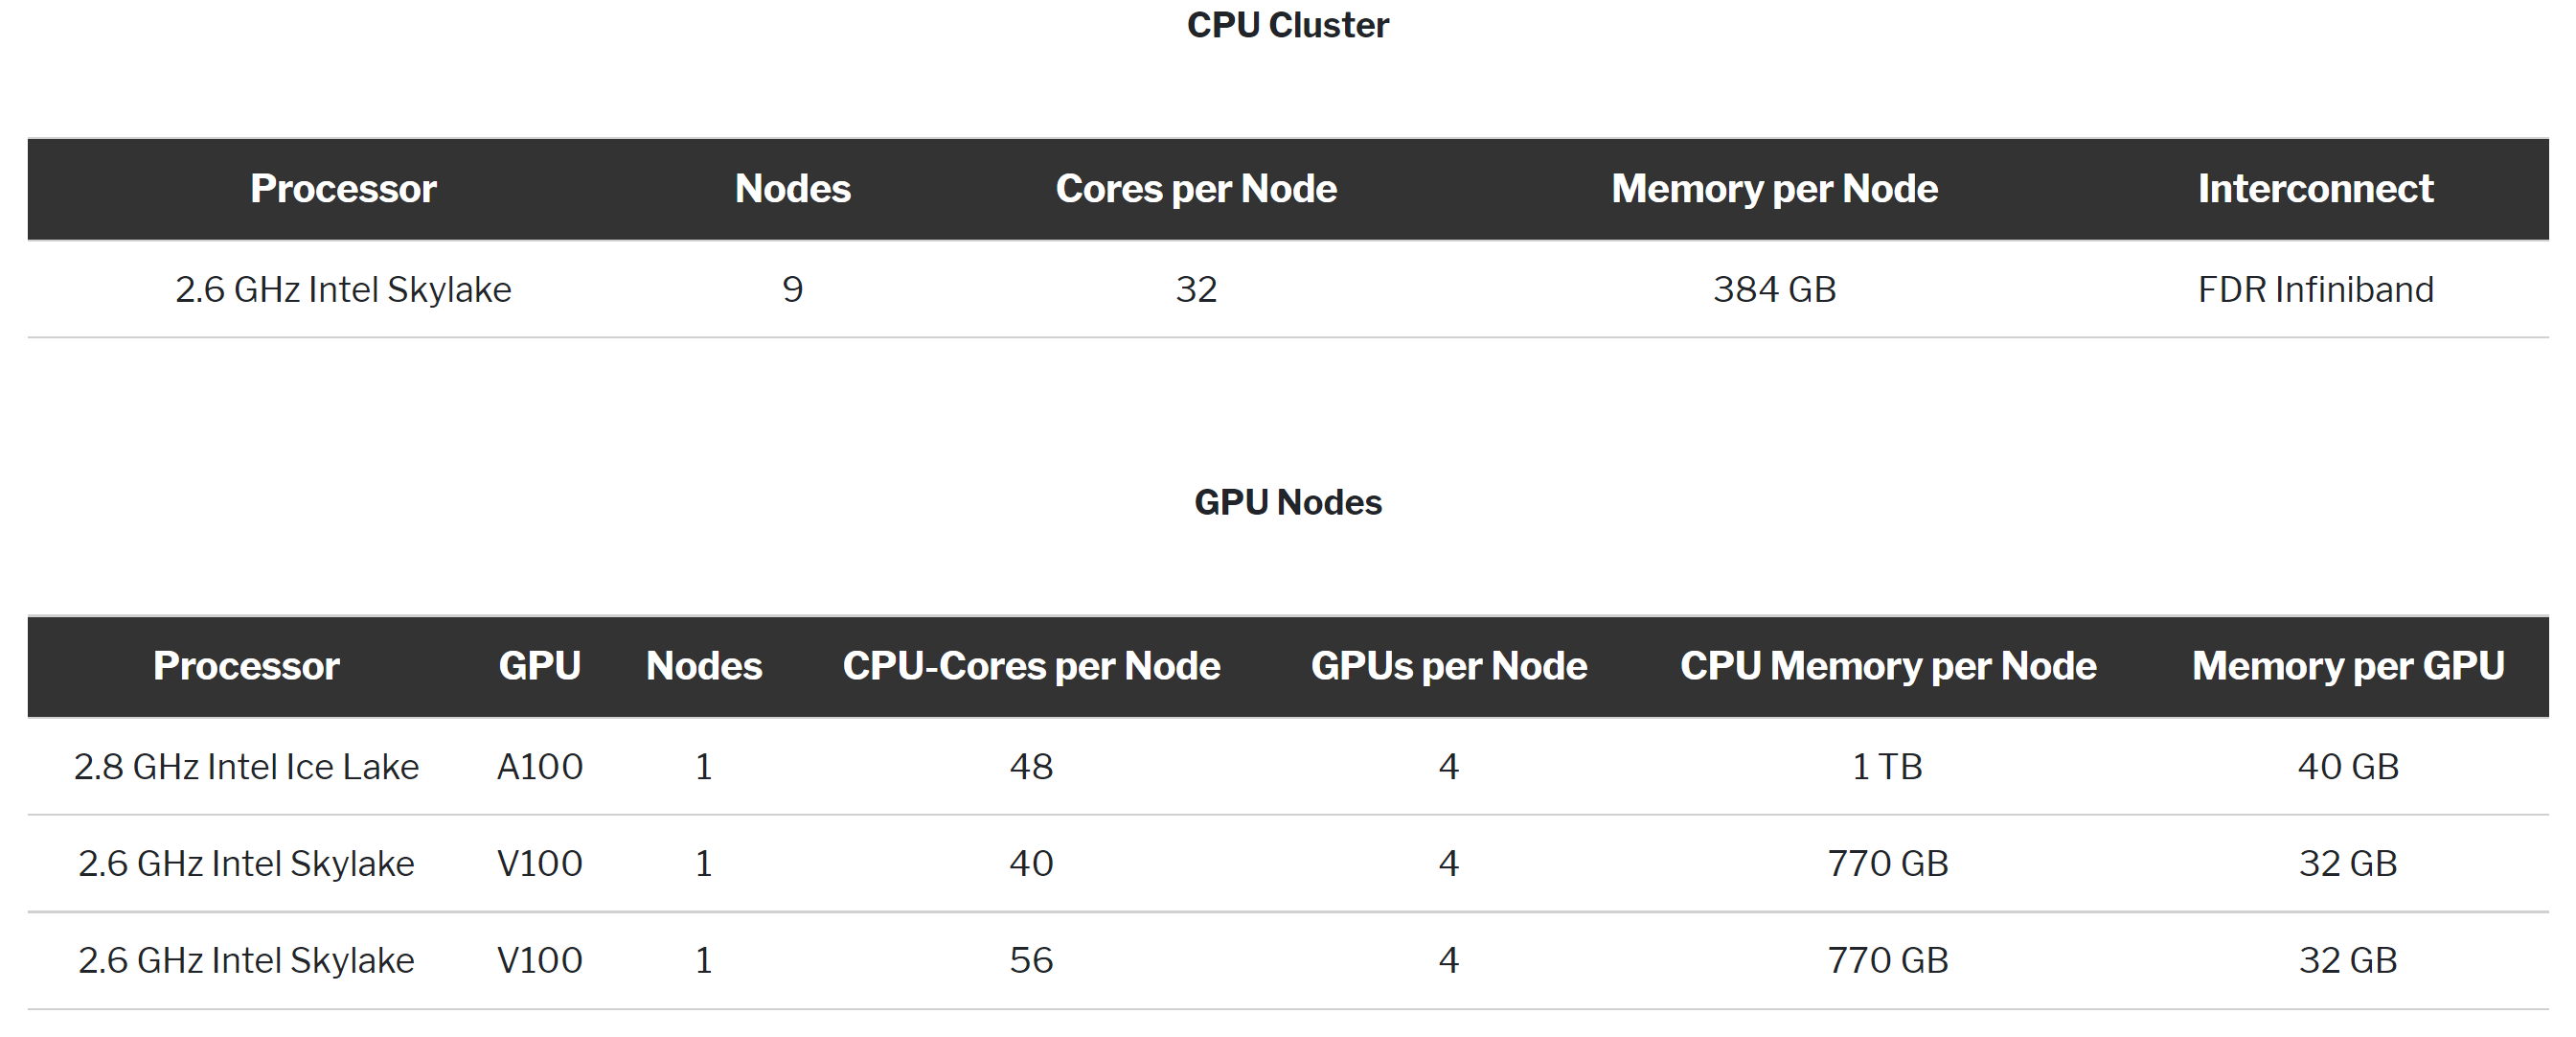

## 4. Notes On Linux and Windows Command Line

### 3.a. Linux Command Line

In [ ]:
# 1. Linux Command Lines
ls                                                  # list storage, shows everything in current directory
~                                                   # represents home folder
/                                                   # represents the root folder
$                                                   # not administrator account
pwd                                                 # prints present working directory
ls <something in current directory>                 # using ls on relative path
ls /Users/blahblahblah                              # using ls on absolute path
ls -a                                               # shows hidden folders as well
ls -l                                               # same command but more detail
ls - la                                             # combines -l and -a
cd <something in current directory>                 # changing your directory
# * press tab *                                     # autocomplete
cd ..                                               # goes back a directory
cd ~                                                # goes back to home folder
cd /                                                # goes back to root folder
# "\ "                                              # a space in \bin\bash
pushd <path>                                        # goes to that directory
popd                                                # brings you back to where you were before pushd
file <filename>                                     # tells us more about what we are looking at
locate <filename>                                   # returns everything with filename and its path
sudo updatedb                                       # updates locate database
which <command name>                                # sees if desired command is on computer and prints its path
history                                             # prints previous commands
what is <command name>                              # tells you what the command does
apropos <keyword>                                   # returns commands that have to do with that keyword
man <command name>                                  # manual entry for command
mkdir <name>                                        # makes a directory/folder
touch <name>                                        # changes date when last editted and if it DNE then it will make a text file with that name
cp <path-file> <path-directory>                     # copying a file from one location to the other
mv <path-file> <path-directory>                     # moving a file from one location to the other
rm <path-file>                                      # removing a file
rm <keyword>                                        # removing all files that start with that keyword
rm -r <path-directory>                              # removes a directory that has stuff in it
rmdir <path-directory>                              # only removes empty directories
cat >> <path-file> (you write) *Ctl + d*            # concatinates what wrote into this file
cat <path-textfile1> <path-textfile2>               # concatinates the two text files together
less <path-file>                                    # reading text file yourself. "Q" to leave
nano <path-file>                                    # text editor
cat > <path-file> (you write) *Ctl + d*             # rewrites the entire file
<command1> | <command2>                             # takes output of command 1 and puts into command 2
<command1> |> <path-file>                           # takes output of command 1 and rewrites the entire file at <path-file>
clear                                               # clears terminal
sudo <command>                                      # runs as root user
sudo -s                                             # short timer that runs you as root
exit                                                # leaving root environment
su - <username>                                     # enter subshell in your user shell as <username>
su <username>                                       # changing your shell as <username>
users                                               # shows who is logged in
id                                                  # user id information
chmod <###> <path-file>                             # changes rwx permissions, # \in [0,7] \cap Z, # = r + w + x, see below
# * Ctl + c *                                       # kills running command in terminal
killall <name>                                      # kills all processes starting with <name>
exit                                                # ends terminal session
# * Ctl + + *                                       # increases text size in terminal

# 2. Access Numbers in ls -l A.K.A. rwx Permissions
# rwx rwx rwx
# (you) (group) (everyone)
# r = read, w = write, x = exacutable
# (r, w, x) \in {0, 4} x {0, 2} x {0, 1}
# 0 is not allowed

### 3.b Windows Command Line

In [ ]:
# 1. Windows Command Lines
dir                                                 # ls in Linux

## 4. Notes On SLURM Commands and Script

### 4.a General SLURM Commands

In [ ]:
# 1. Login and Exit                                 # if off-campus, then connect to GlobalProtect VPN
ssh gm0796@adroit.princeton.edu                     # login
exit                                                # exit

# 2. Preventing The Lose Of Connection
ssh gm0796@adroit.princeton.edu                     # login
tmax                                                # "tmax" starts a login shell to the head node that you control remotely.
# * disconnected *
ssh gm0796@adroit.princeton.edu                     # login
tmax attach

# 3. Cluster Commands
checkquota                                          # see your usage of disk space, check that you have enough space in your folders
cat /etc/os-release                                 # information about operation system
lscpu                                               # information about the CPUs on that particular node
snodes                                              # information about compute nodes
shownodes                                           # information about compute nodes (easier to read)
sinfo                                               # see how nodes are being used
sinfo -p gpu                                        # see how GPUs are being used
sbatch <name-of-slurm-script>                       # submits your job to the scheduler
squeue                                              # displays all jobs that are running or waiting to run
squeue -u gm0796                                    # see your jobs that are running or waiting to run
squeue -u gm0796 --start                            # report the expected start time for pending jobs
scancel <jobid>                                     # cancel a job
scancel --user=gm0796                               # cancel all jobs
seff <jobid>                                        # see results of completed job
shistory                                            # displays your job history
jobstats                                            # see accurate metrics of memory, CPU, and GPU usage from jobs
cat slurm<jobid>.out                                # see terminal output of job

### 4.b Commands Used During Workflow

In [ ]:
# THINGS TO REMEMBER:
# 1. Data Storage Directories
/home/gm0796                                        # for source code, executables, environments, packages, and small data sets (10 GB)
/scratch/network/gm0796                             # for job input/output files (100 GB), not backed up

# WORKFLOW:
# 1. SSH into the cluster
ssh gm0796@adroit.princeton.edu                     # login

# 2. Loading in Environments/Software on /home/gm0796
module avail                                        # show available modules on \home\gm0796
module load <full name>                             # loads desired module
module list                                         # lists all modules currently loaded
conda list                                          # lists all the packages included in Anaconda Python
module purge                                        # removes all modules
module unload <full name>                           # removes a specific module

# 3. Downloading Packages Using Conda
module load anaconda3/2021.11                       # loading anaconda3 base environment
conda create --name nonlinProjEnv pytorch           # installing pytorch from conda
conda activate nonlinProjEnv                        # activating the environment
conda list                                          # listing what packages are in conda environment
conda deactivate                                    # removing the environment part 1
conda remove --name nonlinProjEnv --all             # removing the environment part 2a
conda env remove --name nonlinProjEnv               # removing the environment part 2b
conda clean --all                                   # removing the environment part 3
cd /scratch/network/gm0796                          # go into ones network folder
mkdir myjob                                         # making a job directory
cd myjob                                            # going into that directory
# * put files and Slurm script in myjob *           # code and data transfer (see 2 below)
sbatch job.slurm                                    # submitting SLURM job to scheduler named "job.slurm"

# 4. Transfering Files Between You and Cluster
# Easiest to Use FileZilla where
# Protocal: SSH
# Host: adroit.princeton.edu
# Logon Type: Interactive
# User: gm0796

# 5. Example SLURM Script
#!/bin/bash
#SBATCH --job-name = nonlinProj                     # create a short name for your job
#SBATCH --nodes = 1                                 # node count
#SBATCH --ntasks = 1                                # total number of tasks across all nodes
#SBATCH --cpus-per-task = 1                         # cpu-cores per task (>1 if multi-threaded tasks)
#SBATCH --mem-per-cpu = 4G                          # memory per cpu-core (4G is default)
#SBATCH --gres = gpu:1                              # number of gpus per node
#SBATCH --time = 02:00:00                           # total run time limit (HH:MM:SS)
#SBATCH --mail-type = begin                         # send email when job begins
#SBATCH --mail-type = end                           # send email when job ends
#SBATCH --mail-user = gm0706@princeton.edu          # email it is sending to
module purge
module load anaconda3/2020.11
conda activate nonlinProj
python myscript.py

## 4. Example Program On The Cluster Using Programs In `cluster` Directory Of `romnet`

In [ ]:
# - For large anaconda environments you might want to create them in the scratch folder. This process is discussed in [3].
#   The below has two sections showing this: (1) Enviroment in Home Folder, (2) Environment in Scratch Folder. In our case,
#   we use option (2).
# - For those using VS Code, in order to edit the slurm script as /bin/bash make sure change the bottom right corner file
#   identifier from CRLF to LF.
# - Note, the GPU option of using the NVIDIA A100 or NVIDIA V100.
# - For those using a GPU, include the following lines in your slurm script:
        #SBATCH --constraint=a100
        #SBATCH --gres=gpu:1

# 1. Creating Software Environment
# (1) Enviroment in Home Folder
ssh gm0796@adroit.princeton.edu                    
module load anaconda3/2022.5
conda create --name nonlinProjEnv pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch        # (NVIDIA A100 GPU)
conda create --name nonlinProjEnv pytorch torchvision torchaudio cudatoolkit=10.2 --channel pytorch # (NVIDIA V100 GPU)
conda activate nonlinProjEnv
conda install scipy
conda install matplotlib
# (2) Environment in Scratch Folder
ssh gm0796@adroit.princeton.edu                    
module load anaconda3/2022.5
conda create --prefix /scratch/network/gm0796/nonlinProjEnv pytorch=1.12 torchvision torchaudio cudatoolkit=11.3 -c pytorch   # (NVIDIA A100 GPU)
conda create --prefix /scratch/network/gm0796/nonlinProjEnv pytorch torchvision torchaudio cudatoolkit=10.2 --channel pytorch # (NVIDIA V100 GPU)
conda activate /scratch/network/gm0796/nonlinProjEnv
conda install scipy
conda install matplotlib

# 2. The SLURM script job.slurm
#!/bin/bash
#SBATCH --job-name=romnet
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=4
#SBATCH --mem-per-cpu=1G
#SBATCH --time=2:00:00
#SBATCH --mail-type=begin
#SBATCH --mail-type=end
#SBATCH --mail-user=gm0796@princeton.edu
module purge
module load anaconda3/2022.5
conda activate /scratch/network/gm0796/nonlinProjEnv      # This is option (2). Option (1) is: conda activate nonlinProjEnv.
python ./examples/train.py $1 $2                          # Train a romnet with model name $1 and training number $2.
python ./examples/$1.py rom $2                            # Generate the ROM trajectories assocated with romnet $2.
python ./examples/$1.py test $2 savefig                   # Generate the test qualifications and save figures.

# 3. Create Directory in "\scratch\network\newDirc" Using FileZilla
cd /
cd /scratch/network/gm0796                                   
# * put files and Slurm script in via FileZilla: 
#      - put the examples directory in /scratch/network/gm0796
#      - put the romnet package in /scratch/network/gm0796/examples *

# 4. The bash script "run_jobs.sh"
#!/bin/bash
for i in {1..8}; do
    sbatch job.slurm $1 $i                                # Run job.slurm for romnet with model name $1 and training number $i.
done

# 5. Submit 8 Jobs Training The Noack Model
bash run_jobs.sh noack

# 6. Checking Jobs Status
squeue -u gm0796

# 7. Move Output in "\scratch\network\newDirc" to LapTop Using FileZilla